## Actividad 7
Elabora un modelo predictivo aplicando el algoritmo clasificador Bayesiano para resolver un problema de clasificación utilizando lenguaje Python

Con el fin de clasificar las distintas actividades que puede realizar una persona, se realizó un experimento a un grupo de 30 voluntarios dentro de un grupo de edad de 19 a 48 años. Cada persona realizó seis actividades (CAMINAR, CAMINAR POR LAS ESCALERAS, BAJAR LAS ESCALERAS, SENTARSE, DE PIE, RECOSTARSE) con un smartphone (Samsung Galaxy S II) conectado en su cintura. Usando el acelerómetro y giroscopio integrados en el smartphone, se tienen la siguiente data:

- Aceleración triaxial del acelerómetro (aceleración total) y la aceleración corporal estimada.
- Velocidad angular triaxial del giroscopio.
- Variables de dominio de tiempo y frecuencia.
- Su etiqueta de actividad.
- Un identificador del sujeto que realizó el experimento.

El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos (train y test), donde se seleccionó al 70% de los voluntarios para generar los datos de entrenamiento y al 30% los datos de la prueba.

In [19]:
import pandas as pd
import seaborn as sns

### 1.  Cargue  los  set  de  datos  de  entrenamiento  y  prueba.  ¿Cuáles  son  las dimensiones de estos set de datos?

In [9]:
df_train = pd.read_csv('https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv')
df_train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
4659,0.164332,0.003476,-0.13562,0.315744,0.357465,-0.244591,0.277314,0.363728,-0.351415,0.411769,...,-0.530381,0.73496,-0.254613,-0.894778,0.149899,-0.771585,0.252715,0.050754,22,WALKING_DOWNSTAIRS


In [12]:
df_train.shape

(7352, 563)

In [49]:
df_test = pd.read_csv('https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv')
df_test.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2584,0.280348,-0.032913,-0.061788,-0.964032,-0.773387,-0.868260,-0.975269,-0.758659,-0.857835,-0.863260,...,-0.201735,-0.001917,0.197684,0.226381,-0.371652,-0.846712,0.183827,0.082967,24,STANDING
2196,0.210650,-0.058295,-0.123296,-0.427855,-0.212583,-0.311737,-0.487290,-0.219249,-0.380234,-0.213704,...,-0.850126,0.132641,0.744819,-0.974976,-0.493940,-0.586804,0.299557,0.222701,18,WALKING_UPSTAIRS
169,0.330148,0.018983,-0.042531,-0.961897,-0.847142,-0.763820,-0.962593,-0.829188,-0.733149,-0.873754,...,-0.765821,-0.110768,0.099816,-0.062580,-0.519440,-0.569389,0.376260,-0.086252,2,STANDING
2353,0.298744,-0.052431,-0.130287,0.016623,0.600825,0.113084,-0.040125,0.439247,-0.005967,0.471334,...,-0.054663,-0.337452,0.109002,0.940409,-0.414029,-0.671152,0.288455,0.144089,20,WALKING_DOWNSTAIRS
2628,0.274934,-0.012630,-0.122805,-0.992728,-0.973335,-0.951904,-0.993312,-0.974129,-0.951089,-0.939542,...,-0.933601,0.020688,0.023860,0.015683,0.269247,-0.877811,0.012299,0.038708,24,SITTING


In [13]:
df_test.shape

(2947, 563)

### 2.  Estudie la cantidad de registros que hay en cada actividad en el set de entrenamiento.  Para  esto,  una  opción  es  utilizar  la  función  de  pandas crosstab(index=columna, columns="count"). ¿Cómo se encuentran repartidas las Actividades? ¿Existe algún desbalance en las categorías? (realice un gráfico que acompañe su análisis) Comente.

In [23]:
import matplotlib.pyplot as plt

In [18]:
tabla = pd.crosstab(index=df_train['Activity'],columns='count').reset_index()
tabla

col_0,Activity,count
0,LAYING,1407
1,SITTING,1286
2,STANDING,1374
3,WALKING,1226
4,WALKING_DOWNSTAIRS,986
5,WALKING_UPSTAIRS,1073


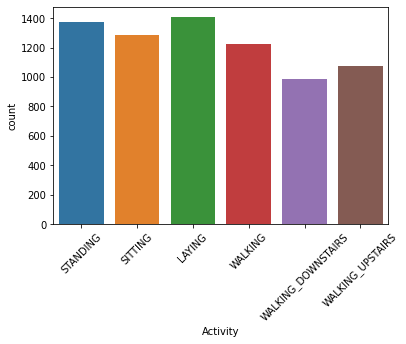

In [29]:
sns.countplot(x='Activity', data = df_train)
plt.xticks(rotation = 45)
plt.show()

Se puede decir que las categorias se encuentran balanceadas ya que no existe alguna categoria que tenga uan gran mayoria de los datos y que pueda desbalancear el modelo.

### 3.  Defina X_train y X_test como corresponda (omitiendo las variables que no corresponden a variables predictoras). 

In [30]:
X_train = df_train.drop(columns=['subject','Activity'])
X_test = df_test.drop(columns=['subject','Activity'])

### 4.  Estandarice el set de features de entrenamiento y prueba. Puede utilizar la función StandardScaler: 

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [51]:
# Escalar los datos de entrenamiento y prueba utilizando MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
#x_train_stand = StandardScaler().fit_transform(X_train)
#x_test_stand = StandardScaler().fit_transform(X_test)

### 5.  Defina  y_train  e  y_test  como  corresponda  (recuerde  que  debe  estar codificada numéricamente). Para recodificar un vector o columna y de varias categorías a formato numérico puede utilizar: 

In [33]:
from sklearn import preprocessing

In [34]:
y_train = df_train['Activity']
y_test = df_test['Activity']

In [35]:
encoder_train = preprocessing.LabelEncoder().fit(y_train) 
y_train_encoder = encoder_train.transform(y_train)

In [36]:
encoder_test = preprocessing.LabelEncoder().fit(y_test) 
y_test_encoder = encoder_test.transform(y_test)

### 6. Utilice la función GridSearchCV para realizar 10 validaciones cruzadas con la lista de parámetros definida anteriormente. Determine la mejor combinación de parámetros y obtenga el modelo con dichos parámetros.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Definir los parámetros a probar
parametros = {
    'alpha': [0.1, 0.5, 1.0, 10],
    'fit_prior': [True, False]
    #'class_prior': [None, [0.2, 0.8], [0.5, 0.5]]
}

# Crear el modelo MultinomialNB
modelo = MultinomialNB()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=5)

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train_encoder)

# Obtener los mejores parámetros y puntajes
mejores_parametros = grid_search.best_params_
mejor_puntaje = grid_search.best_score_

In [66]:
mejores_parametros

{'alpha': 10, 'fit_prior': True}

In [67]:
mejor_puntaje

0.8350131568602969

### 7. ¿Cómo es la capacidad predictiva de este modelo en el set de prueba? Comente.

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_model = MultinomialNB(alpha=10, fit_prior= True)
best_model.fit(X_train_scaled, y_train_encoder)

# Obtener las predicciones del modelo en el set de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la precisión del modelo en el set de prueba
accuracy = accuracy_score(y_test_encoder, y_pred)

print("Precisión del modelo en el set de prueba:", accuracy)

Precisión del modelo en el set de prueba: 0.8561248727519511


Es un modelo que funciona bien ya que tiene un presicion del 85% del cual ademas se pudo llegar a los parametros adecuados para mejorar la precision usando gridsearch.